# Реализация метода главных компонент

## Вычисление главных компонент и трансформация данных

Модули, настройка, функции.

In [1]:
import numpy as np
np.random.seed(seed=333)
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA

In [2]:
def get_shiny_square_axes(ax):
  '''Общая настройка осей графиков'''
  ax.grid(True)
  ax.set_axisbelow(True)
  ax.set_aspect(aspect=1, adjustable='datalim')
  ax.set_xlabel('x')
  ax.set_ylabel('y')

Генерация матрицы двух линейно-независимых признаков.

In [3]:
# Сгенерировать линейно независимые величины
# x = 5 * np.random.randn(30)
# y = 5 * np.random.randn(30)

# Сгенерировать линейно зависимые величины
x = np.arange(1, 31)
y = x + 4 * np.random.randn(30)

# Матрица признаков.
X = np.stack((x, y), axis=1)
X

array([[ 1.        ,  7.86873717],
       [ 2.        ,  3.29877333],
       [ 3.        ,  1.1018264 ],
       [ 4.        ,  3.44832679],
       [ 5.        ,  7.09975827],
       [ 6.        ,  4.56865667],
       [ 7.        ,  4.08718033],
       [ 8.        ,  5.43165418],
       [ 9.        ,  7.73180937],
       [10.        ,  5.12399428],
       [11.        , 10.79207863],
       [12.        , 14.77610924],
       [13.        , 12.50560897],
       [14.        , 21.09446837],
       [15.        , 16.09077014],
       [16.        , 15.14816714],
       [17.        , 15.10715024],
       [18.        , 16.74599568],
       [19.        , 25.48669554],
       [20.        , 22.87179707],
       [21.        , 12.51274834],
       [22.        , 21.02966228],
       [23.        , 19.69275512],
       [24.        , 18.89017203],
       [25.        , 26.27225012],
       [26.        , 27.06868788],
       [27.        , 34.30237875],
       [28.        , 28.60988825],
       [29.        ,

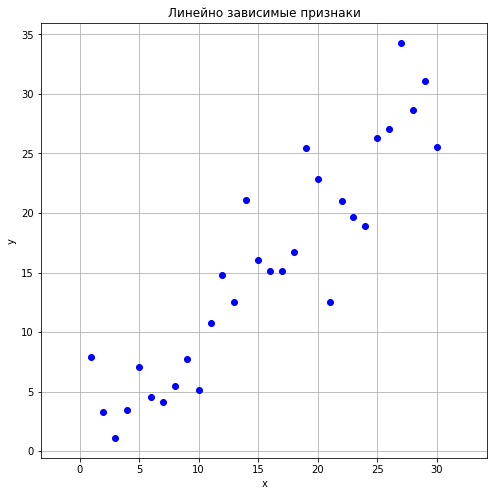

In [4]:
_, ax = plt.subplots(figsize=(8, 8))
ax.plot(X[:, 0], X[:, 1], 'bo')
get_shiny_square_axes(ax)
ax.set_title('Линейно зависимые признаки')
plt.show()

Стандартизация данных.

Средние значения признаков:
 [15.5        15.51179911] 

Исправленные стандартные отклонения:
 [8.80340843 9.38722333] 

Стандартизированные значения признаков:
 [[-1.64708932 -0.81419837]
 [-1.53349695 -1.30102644]
 [-1.41990459 -1.53506231]
 [-1.30631222 -1.28509485]
 [-1.19271985 -0.89611598]
 [-1.07912749 -1.1657486 ]
 [-0.96553512 -1.2170392 ]
 [-0.85194275 -1.0738154 ]
 [-0.73835038 -0.82878498]
 [-0.62475802 -1.10658972]
 [-0.51116565 -0.50278131]
 [-0.39757328 -0.0783714 ]
 [-0.28398092 -0.32024274]
 [-0.17038855  0.59470933]
 [-0.05679618  0.06167649]
 [ 0.05679618 -0.0387369 ]
 [ 0.17038855 -0.04310634]
 [ 0.28398092  0.13147621]
 [ 0.39757328  1.06260351]
 [ 0.51116565  0.78404419]
 [ 0.62475802 -0.3194822 ]
 [ 0.73835038  0.58780568]
 [ 0.85194275  0.44538793]
 [ 0.96553512  0.35989054]
 [ 1.07912749  1.14628689]
 [ 1.19271985  1.23112963]
 [ 1.30631222  2.00171861]
 [ 1.41990459  1.39531027]
 [ 1.53349695  1.65869497]
 [ 1.64708932  1.0654625 ]] 



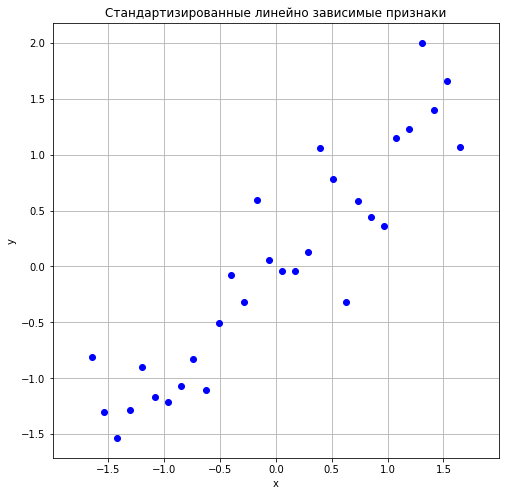

In [21]:
X_std = X.std(axis=0, ddof=1)
X_mean = X.mean(axis=0)

X_standardized = np.zeros_like(X)
for i in range(X_standardized.shape[1]):
  X_standardized[:, i] = (X[:, i] - X_mean[i]) / X_std[i]

print('Средние значения признаков:\n', X_mean, '\n')
print('Исправленные стандартные отклонения признаков:\n', X_std, '\n')
print('Стандартизированные значения признаков:\n', X_standardized, '\n')

_, ax = plt.subplots(figsize=(8, 8))
ax.plot(X_standardized[:, 0], X_standardized[:, 1], 'bo')
ax.set_title('Стандартизированные линейно зависимые признаки')
get_shiny_square_axes(ax)
plt.show()

Ковариационная матрица. Для стандартизированных признаков она совпадает с корреляционной матрицей.

In [6]:
CM = np.cov(X_standardized.T)
print(f'Матрица ковариации стандартизированных признаков:\n {CM.round(2)}')
print(f'\nДисперсия x:\n {CM[0, 0]:.2f}')
print(f'\nДисперсия y:\n {CM[1, 1]:.2f}')
print(f'\nКовариация x и y:\n {CM[0, 1]:.2f}')

Матрица ковариации стандартизированных признаков:
 [[1.   0.92]
 [0.92 1.  ]]

Дисперсия x:
 1.00

Дисперсия y:
 1.00

Ковариация x и y:
 0.92


Отобразим столбцы матрицы ковариации на графике. В нашем двумерном случае они образуют базис из красного и зеленого векторов:

* чем сильнее положительная линейная зависимость признаков и, соответственно, чем ближе значение коэффициента их корреляции к 1, тем меньше угол между векторами;

* чем сильнее отрицательная линейная зависимость признаков и, соотвественно, чем ближе коэффициент корреляции к -1, тем ближе угол между векторами к развернутому;

* чем линейная зависимость слабее, то есть чем ближе коэффициент корреляции к 0, тем угол между векторами ближе к прямому.

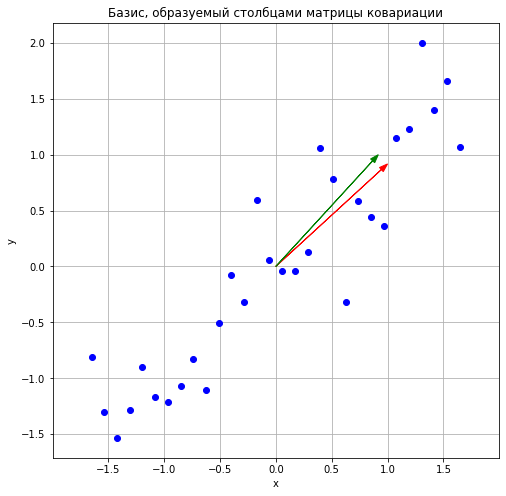

In [7]:
_, ax = plt.subplots(figsize=(8, 8))
ax.plot(X_standardized[:, 0], X_standardized[:, 1], 'bo')
ax.arrow(0, 0, CM[0, 0], CM[1, 0], length_includes_head=True, head_width=0.05,
  lw=1, color='r')
ax.arrow(0, 0, CM[0, 1], CM[1, 1], length_includes_head=True, head_width=0.05,
  lw=1, color='g')
ax.set_title('Базис, образуемый столбцами матрицы ковариации')
get_shiny_square_axes(ax)
plt.show()

Собственные векторы ковариационной матрицы.

In [8]:
# Вектор собственных значений и матрица собственных векторов ков. матрицы
ev, EV = np.linalg.eig(CM)
# Упорядочивание собственных значений и собственных векторов по убыванию первых,
# т.к. главная компонента определяется наибольшим собственным значением
idx = ev.argsort()[::-1]
ev, EV = ev[idx], EV[:, idx]
print('Вектор собственных значений матрицы ковариации:\n',\
  ev.round(2))
print('\nМатрица собственных векторов матрицы ковариации (столбцы):\n',\
  EV.round(2))

Вектор собственных значений матрицы ковариации:
 [1.92 0.08]

Матрица собственных векторов матрицы ковариации (столбцы):
 [[ 0.71 -0.71]
 [ 0.71  0.71]]


Матрица собственных векторов **EV** образует ортогональный базис (матрицу поворота) главных компонент. Собственные векторы в матрице **EV** были упорядочены в порядке убывания собственных значений **ev**. В этом случае признаки при проецировании на оси базиса **EV** будут иметь наибольшую дисперсию вдоль первой оси (самой главной компоненты), меньшую вдоль второй оси, еще меньшую вдоль третьей и т.д.

В рассматриваемом примере пространство признаков двумерное. Количество компонент совпадает с количеством измерений пространства признаков.

Каждый собственный вектор подразумевает множество коллинеарных ему векторов, также являющихся собственными. Поэтому при необходимости перед собственными векторами, возвращаемыми функцией `np.linalg.eig`, можно менять знак (направить его в противоположную сторону).

Отобразим собственные векторы на рисунке в виде черной и бирюзовой стрелок.

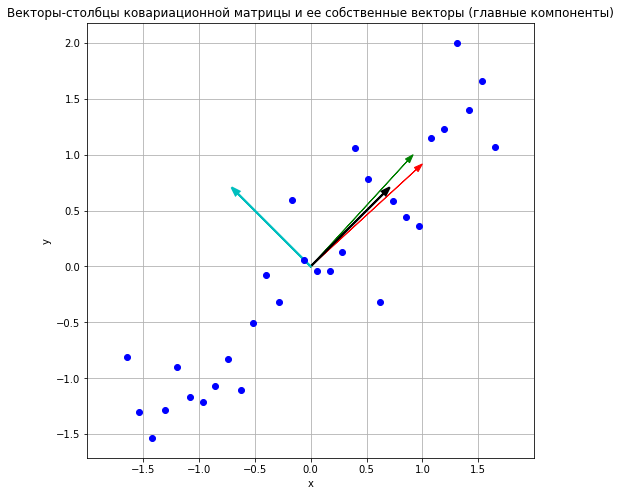

In [9]:
_, ax = plt.subplots(figsize=(8, 8))
ax.plot(X_standardized[:, 0], X_standardized[:, 1], 'bo')
ax.arrow(0, 0, CM[0, 0], CM[0, 1], length_includes_head=True, head_width=0.05,
  lw=1, color='r')
ax.arrow(0, 0, CM[1, 0], CM[1, 1], length_includes_head=True, head_width=0.05,
  lw=1, color='g')
ax.arrow(0, 0, EV[0, 0], EV[1, 0], length_includes_head=True, head_width=0.05,
  lw=2, color='k')
ax.arrow(0, 0, EV[0, 1], EV[1, 1], length_includes_head=True, head_width=0.05,
  lw=2, color='c')
ax.set_title('Векторы-столбцы ковариационной матрицы и ее собственные векторы\
 (главные компоненты)')
get_shiny_square_axes(ax)
plt.show()

Проверим матрицу собственных векторов на ортогональность, вычислив $E^T \cdot E$.

In [10]:
(EV.T @ EV).round(2)

array([[ 1., -0.],
       [-0.,  1.]])

Вычислим координаты признаков в базисе главных компонент. Аналогичным образом трансформируем матрицу ковариации стандартизированных исходных признаков.

По углу между векторами столбцами матрицы ковариации можно судить о силе и знаке линейной зависимости исходных признаков.

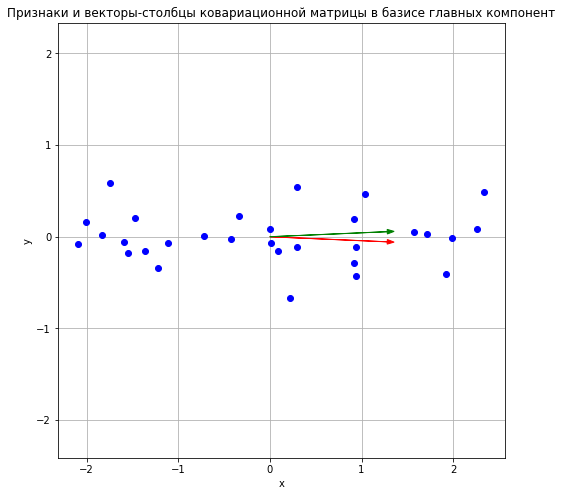

In [11]:
# Проекции на базис главных компонент
X_pca = (X_standardized @ EV)
CM_pca_ = CM.T @ EV

_, ax = plt.subplots(figsize=(8, 8))
ax.plot(X_pca[:, 0], X_pca[:, 1], 'bo')
ax.arrow(0, 0, CM_pca_[0, 0], CM_pca_[0, 1], length_includes_head=True,
  head_width=0.05, lw=1, color='r')
ax.arrow(0, 0, CM_pca_[1, 0], CM_pca_[1, 1], length_includes_head=True,
  head_width=0.05, lw=1, color='g')
ax.set_title('Признаки и векторы-столбцы ковариационной матрицы в базисе\
 главных компонент')
get_shiny_square_axes(ax)
plt.show()

Вычислим матрицу ковариации для преобразованных признаков, а также доли дисперсии, объясненные главными компонентами.

Можно заметить, что в базисе главных компонент признаки распределены так, что их ковариации стали равны нулю: преобразованные признаки линейно независимы.

При этом на первую главную компоненту приходится значительная доля дисперсии. Величина доли в общем случае пропорциональна степени линейной зависимости исходных признаков. 

In [12]:
CM_pca = np.cov(X_pca.T)

print('Матрица ковариации признаков в базисе главных компонент:\n',
  CM_pca.round(2))

print('\nДоли дисперсии, объясненные первой и второй компонентами, %:\n',
  (100 * np.diag(CM_pca) / CM_pca.trace()).round(2))

Матрица ковариации признаков в базисе главных компонент:
 [[ 1.92 -0.  ]
 [-0.    0.08]]

Доли дисперсии, объясненные первой и второй компонентами, %:
 [95.86  4.14]


## Восстановление данных

Восстановленные признаки совпадают с исходными.

In [13]:
X_standardized_restored = X_pca @ EV.T
X_restored = np.zeros_like(X_standardized_restored)
for i in range(X_restored.shape[1]):
  X_restored[:, i] =  X_std[i] * X_standardized_restored[:, i] + X_mean[i]

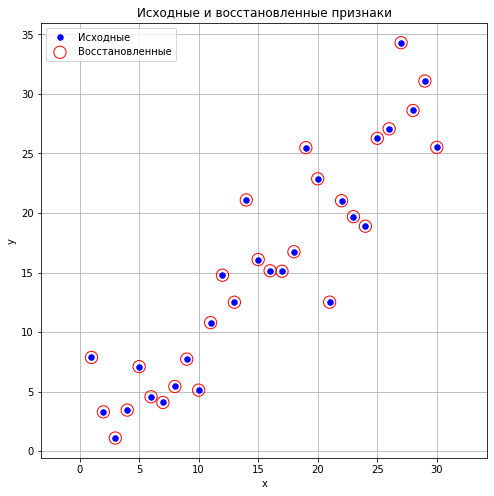

In [14]:
_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], facecolors='b', s=30, edgecolors='b')
ax.scatter(X_restored[:, 0], X_restored[:, 1],  s=150, edgecolors='r',
  facecolors='none')
ax.set_title('Исходные и восстановленные признаки')
ax.legend(['Исходные', 'Восстановленные'])
get_shiny_square_axes(ax)
plt.show()

Модули ошибок между исходными и восстановленными данными имеют порядок вычислительных ошибок.

In [15]:
abs(X - X_restored)

array([[1.77635684e-15, 2.66453526e-15],
       [0.00000000e+00, 4.44089210e-16],
       [0.00000000e+00, 1.99840144e-15],
       [0.00000000e+00, 4.44089210e-16],
       [0.00000000e+00, 0.00000000e+00],
       [1.77635684e-15, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.77635684e-15],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

Сумма модулей ошибок для каждого признака.

In [16]:
sum(abs(X - X_restored))

array([3.55271368e-15, 1.08801856e-14])

## Проверка алгоритма

Сравним примененную трансформацию стандартизированных данных в базис главных компонент с аналогичной трансформацией библиотеки Scikit-learn.

In [17]:
pca = PCA(n_components=2)
X_pca_skl = pca.fit_transform(X_standardized)

Знаки главных компонент, полученных с помощью функции `PCA`, могут отличаться от знаков компонент на выходе примененного ранее алгоритма. Откорректируем знаки компонент, возвращаемых `PCA`, соответствующим образом.

In [18]:
for i in range(X_pca_skl.shape[1]):
  if sum(abs(X_pca_skl[:, i] + X_pca[:, i])) < sum(abs(X_pca_skl[:, i] - X_pca[:, i])):
    X_pca_skl[:, i] *= -1

Модули ошибок также имеют порядок ошибки вычисления.

In [19]:
abs(X_pca_skl - X_pca)

array([[2.22044605e-16, 1.11022302e-16],
       [0.00000000e+00, 4.71844785e-16],
       [0.00000000e+00, 3.19189120e-16],
       [2.22044605e-16, 3.79904441e-16],
       [2.22044605e-16, 3.60822483e-16],
       [0.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 3.88578059e-16],
       [2.22044605e-16, 3.60822483e-16],
       [2.22044605e-16, 2.63677968e-16],
       [2.22044605e-16, 2.22044605e-16],
       [1.11022302e-16, 3.25260652e-16],
       [2.22044605e-16, 1.94289029e-16],
       [1.66533454e-16, 2.60208521e-16],
       [3.33066907e-16, 1.11022302e-16],
       [2.35488712e-16, 1.94289029e-16],
       [1.89084859e-16, 2.08166817e-16],
       [2.08166817e-16, 2.22044605e-16],
       [2.77555756e-16, 1.80411242e-16],
       [2.22044605e-16, 0.00000000e+00],
       [3.33066907e-16, 1.38777878e-16],
       [2.49800181e-16, 4.44089210e-16],
       [1.11022302e-16, 1.94289029e-16],
       [1.11022302e-16, 1.66533454e-16],
       [1.11022302e-16, 1.11022302e-16],
       [2.220446

Сумма модулей ошибок для каждого признака.

In [20]:
sum(abs(X_pca_skl - X_pca))

array([5.32343267e-15, 6.50608040e-15])

## Вывод

Реализован алгоритм поиска главных компонент в данных на основе спектрального разложения ковариационной матрицы признаков. Вычисленные значения признаков в базисе главных компонент сравнивались с выходными данными аналогичного алгоритма, реализованного в распространённой библиотеке Scikit-learn. Наблюдаемые отличия находились в пределах погрешности вычисления.